Accuracy: 0.6666666666666666


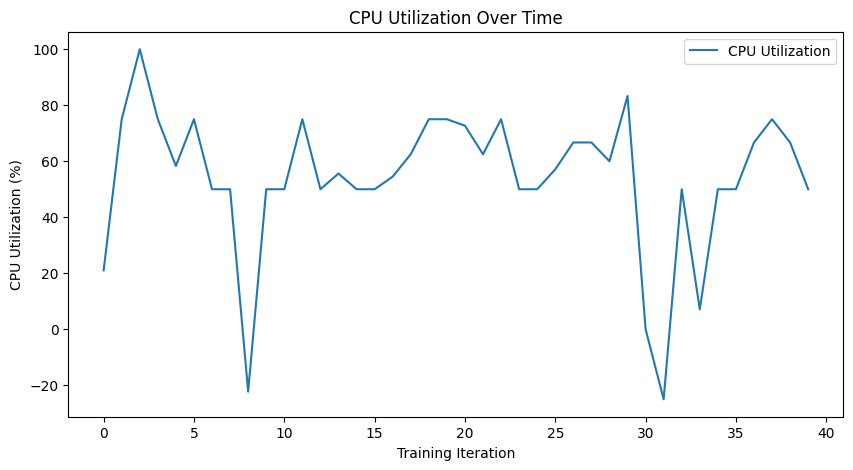

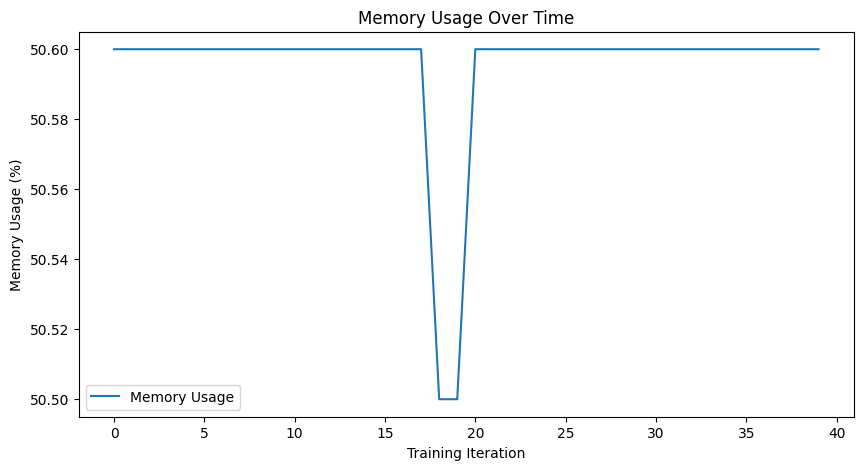

Average CPU Utilization: 54.1025
Average Memory Usage: 50.595
Training time: 1.0873 seconds


In [10]:
import numpy as np
import psutil
import time

def build_tree(X, y, max_depth=None, depth=0):
    num_samples, num_features = X.shape
    unique_classes = np.unique(y)

    # Stop if only one class is present or max depth is reached
    if len(unique_classes) == 1 or (max_depth and depth == max_depth):
        return {"class": unique_classes[0]}

    # Find the best split
    start_cpu_utilization = psutil.cpu_percent()
    best_feature, best_threshold = find_best_split(X, y)
    end_cpu_utilization = psutil.cpu_percent()
    cpu_utilization_log.append(end_cpu_utilization - start_cpu_utilization)

    # Log memory usage
    memory_percent = psutil.virtual_memory().percent
    memory_usage_log.append(memory_percent)

    # Split the data
    left_mask = X[:, best_feature] <= best_threshold
    right_mask = ~left_mask
    left_tree = build_tree(X[left_mask], y[left_mask], max_depth, depth + 1)
    right_tree = build_tree(X[right_mask], y[right_mask], max_depth, depth + 1)

    # Return the decision node
    return {
        "feature_index": best_feature,
        "threshold": best_threshold,
        "left": left_tree,
        "right": right_tree
    }

def find_best_split(X, y):
    num_samples, num_features = X.shape
    if num_samples <= 1:
        return None, None

    # Calculate the Gini impurity for each possible split
    all_thresholds = np.sort(X)
    all_thresholds = (all_thresholds[:-1] + all_thresholds[1:]) / 2.0

    best_gini = float('inf')
    best_feature = None
    best_threshold = None

    for feature_index in range(num_features):
        thresholds = all_thresholds[:, feature_index]
        for threshold in thresholds:
            left_mask = X[:, feature_index] <= threshold
            right_mask = ~left_mask
            gini = calculate_gini(y[left_mask]) + calculate_gini(y[right_mask])
            if gini < best_gini:
                best_gini = gini
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold

def calculate_gini(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities**2)
    return gini

def predict_tree(x, tree):
    if "class" in tree:
        return tree["class"]
    feature_value = x[tree["feature_index"]]
    if feature_value <= tree["threshold"]:
        return predict_tree(x, tree["left"])
    else:
        return predict_tree(x, tree["right"])

# Load the Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
cpu_utilization_log = []
memory_usage_log = []

start_time = time.time()
for _ in range(10):  # Repeat training for better graph visibility
    tree = build_tree(X_train, y_train, max_depth=3)
end_time = time.time()

# Make predictions
y_pred = np.array([predict_tree(x, tree) for x in X_test])

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot CPU utilization over time
plt.figure(figsize=(10, 5))
plt.plot(cpu_utilization_log, label='CPU Utilization')
plt.title('CPU Utilization Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('CPU Utilization (%)')
plt.legend()
plt.show()

# Plot memory usage over time
plt.figure(figsize=(10, 5))
plt.plot(memory_usage_log, label='Memory Usage')
plt.title('Memory Usage Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('Memory Usage (%)')
plt.legend()
plt.show()

# Calculate average CPU and memory utilization
avg_cpu_utilization = np.mean(cpu_utilization_log)
avg_memory_utilization = np.mean(memory_usage_log)

print("Average CPU Utilization:", avg_cpu_utilization)
print("Average Memory Usage:", avg_memory_utilization)
print(f"Training time: {end_time - start_time:.4f} seconds")

Accuracy: 0.6666666666666666


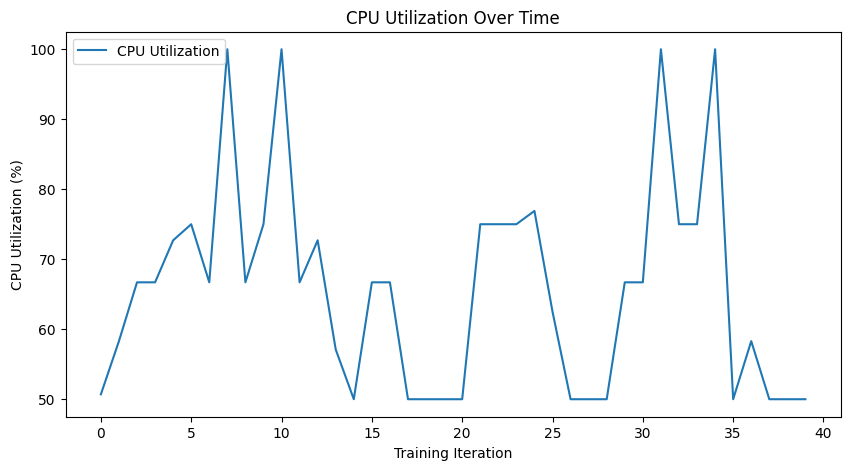

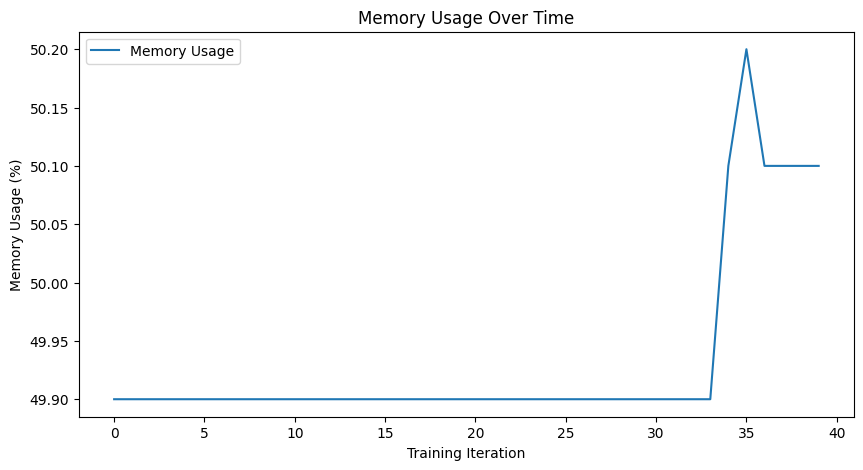

Average CPU Utilization: 65.8625
Average Memory Usage: 49.9325
Training time: 1.1143 seconds


In [11]:
import numpy as np
import psutil
import time

def build_tree(X, y, max_depth=None, depth=0):
    num_samples, num_features = X.shape
    unique_classes = np.unique(y)

    # Stop if only one class is present or max depth is reached
    if len(unique_classes) == 1 or (max_depth and depth == max_depth):
        return {"class": unique_classes[0]}

    # Find the best split
    start_cpu_utilization = psutil.cpu_percent()
    best_feature, best_threshold = find_best_split(X, y)
    end_cpu_utilization = psutil.cpu_percent()
    cpu_utilization_log.append(end_cpu_utilization - start_cpu_utilization)

    # Log memory usage
    memory_percent = psutil.virtual_memory().percent
    memory_usage_log.append(memory_percent)

    # Split the data
    left_mask = X[:, best_feature] <= best_threshold
    right_mask = ~left_mask
    left_tree = build_tree(X[left_mask], y[left_mask], max_depth, depth + 1)
    right_tree = build_tree(X[right_mask], y[right_mask], max_depth, depth + 1)

    # Return the decision node
    return {
        "feature_index": best_feature,
        "threshold": best_threshold,
        "left": left_tree,
        "right": right_tree
    }

def find_best_split(X, y):
    num_samples, num_features = X.shape
    if num_samples <= 1:
        return None, None

    # Calculate the Gini impurity for each possible split
    all_thresholds = np.sort(X)
    all_thresholds = (all_thresholds[:-1] + all_thresholds[1:]) / 2.0

    best_gini = float('inf')
    best_feature = None
    best_threshold = None

    for feature_index in range(num_features):
        thresholds = all_thresholds[:, feature_index]
        for threshold in thresholds:
            left_mask = X[:, feature_index] <= threshold
            right_mask = ~left_mask
            gini = calculate_gini(y[left_mask]) + calculate_gini(y[right_mask])
            if gini < best_gini:
                best_gini = gini
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold

def calculate_gini(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities**2)
    return gini

def predict_tree(x, tree):
    if "class" in tree:
        return tree["class"]
    feature_value = x[tree["feature_index"]]
    if feature_value <= tree["threshold"]:
        return predict_tree(x, tree["left"])
    else:
        return predict_tree(x, tree["right"])

# Load the Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
cpu_utilization_log = []
memory_usage_log = []

start_time = time.time()
for _ in range(10):  # Repeat training for better graph visibility
    tree = build_tree(X_train, y_train, max_depth=3)
end_time = time.time()

# Make predictions
y_pred = np.array([predict_tree(x, tree) for x in X_test])

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot CPU utilization over time
plt.figure(figsize=(10, 5))
plt.plot(cpu_utilization_log, label='CPU Utilization')
plt.title('CPU Utilization Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('CPU Utilization (%)')
plt.legend()
plt.show()

# Plot memory usage over time
plt.figure(figsize=(10, 5))
plt.plot(memory_usage_log, label='Memory Usage')
plt.title('Memory Usage Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('Memory Usage (%)')
plt.legend()
plt.show()

# Calculate average CPU and memory utilization
avg_cpu_utilization = np.mean(cpu_utilization_log)
avg_memory_utilization = np.mean(memory_usage_log)

print("Average CPU Utilization:", avg_cpu_utilization)
print("Average Memory Usage:", avg_memory_utilization)
print(f"Training time: {end_time - start_time:.4f} seconds")

Accuracy: 0.6666666666666666


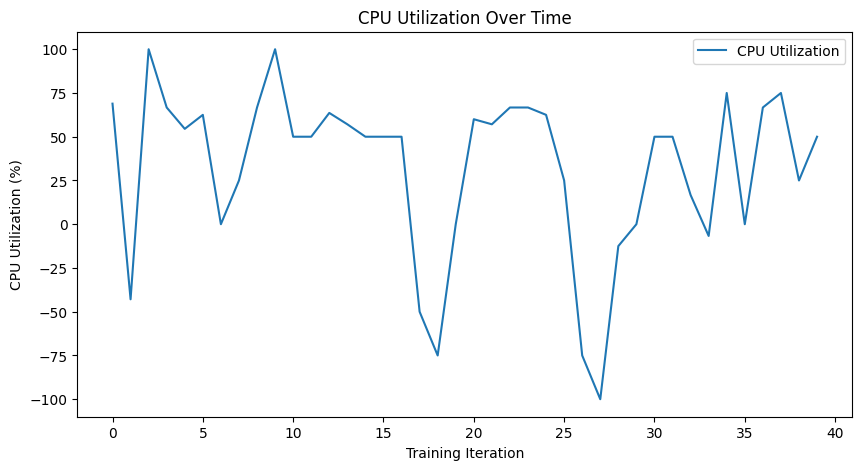

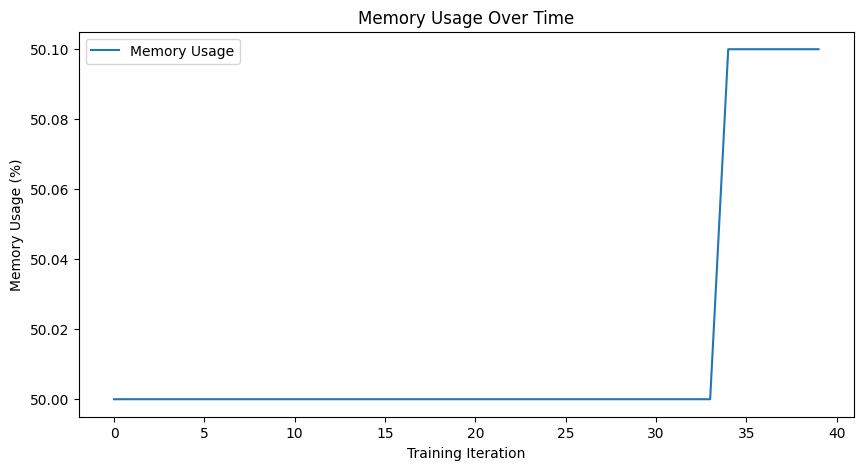

Average CPU Utilization: 32.4825
Average Memory Usage: 50.015
Training time: 1.1023 seconds


In [12]:
import numpy as np
import psutil
import time

def build_tree(X, y, max_depth=None, depth=0):
    num_samples, num_features = X.shape
    unique_classes = np.unique(y)

    # Stop if only one class is present or max depth is reached
    if len(unique_classes) == 1 or (max_depth and depth == max_depth):
        return {"class": unique_classes[0]}

    # Find the best split
    start_cpu_utilization = psutil.cpu_percent()
    best_feature, best_threshold = find_best_split(X, y)
    end_cpu_utilization = psutil.cpu_percent()
    cpu_utilization_log.append(end_cpu_utilization - start_cpu_utilization)

    # Log memory usage
    memory_percent = psutil.virtual_memory().percent
    memory_usage_log.append(memory_percent)

    # Split the data
    left_mask = X[:, best_feature] <= best_threshold
    right_mask = ~left_mask
    left_tree = build_tree(X[left_mask], y[left_mask], max_depth, depth + 1)
    right_tree = build_tree(X[right_mask], y[right_mask], max_depth, depth + 1)

    # Return the decision node
    return {
        "feature_index": best_feature,
        "threshold": best_threshold,
        "left": left_tree,
        "right": right_tree
    }

def find_best_split(X, y):
    num_samples, num_features = X.shape
    if num_samples <= 1:
        return None, None

    # Calculate the Gini impurity for each possible split
    all_thresholds = np.sort(X)
    all_thresholds = (all_thresholds[:-1] + all_thresholds[1:]) / 2.0

    best_gini = float('inf')
    best_feature = None
    best_threshold = None

    for feature_index in range(num_features):
        thresholds = all_thresholds[:, feature_index]
        for threshold in thresholds:
            left_mask = X[:, feature_index] <= threshold
            right_mask = ~left_mask
            gini = calculate_gini(y[left_mask]) + calculate_gini(y[right_mask])
            if gini < best_gini:
                best_gini = gini
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold

def calculate_gini(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities**2)
    return gini

def predict_tree(x, tree):
    if "class" in tree:
        return tree["class"]
    feature_value = x[tree["feature_index"]]
    if feature_value <= tree["threshold"]:
        return predict_tree(x, tree["left"])
    else:
        return predict_tree(x, tree["right"])

# Load the Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
cpu_utilization_log = []
memory_usage_log = []

start_time = time.time()
for _ in range(10):  # Repeat training for better graph visibility
    tree = build_tree(X_train, y_train, max_depth=3)
end_time = time.time()

# Make predictions
y_pred = np.array([predict_tree(x, tree) for x in X_test])

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot CPU utilization over time
plt.figure(figsize=(10, 5))
plt.plot(cpu_utilization_log, label='CPU Utilization')
plt.title('CPU Utilization Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('CPU Utilization (%)')
plt.legend()
plt.show()

# Plot memory usage over time
plt.figure(figsize=(10, 5))
plt.plot(memory_usage_log, label='Memory Usage')
plt.title('Memory Usage Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('Memory Usage (%)')
plt.legend()
plt.show()

# Calculate average CPU and memory utilization
avg_cpu_utilization = np.mean(cpu_utilization_log)
avg_memory_utilization = np.mean(memory_usage_log)

print("Average CPU Utilization:", avg_cpu_utilization)
print("Average Memory Usage:", avg_memory_utilization)
print(f"Training time: {end_time - start_time:.4f} seconds")

Accuracy: 0.6666666666666666


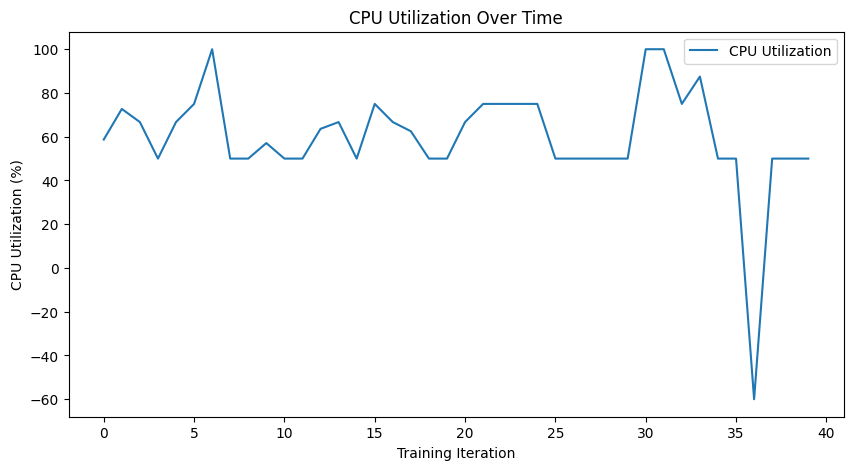

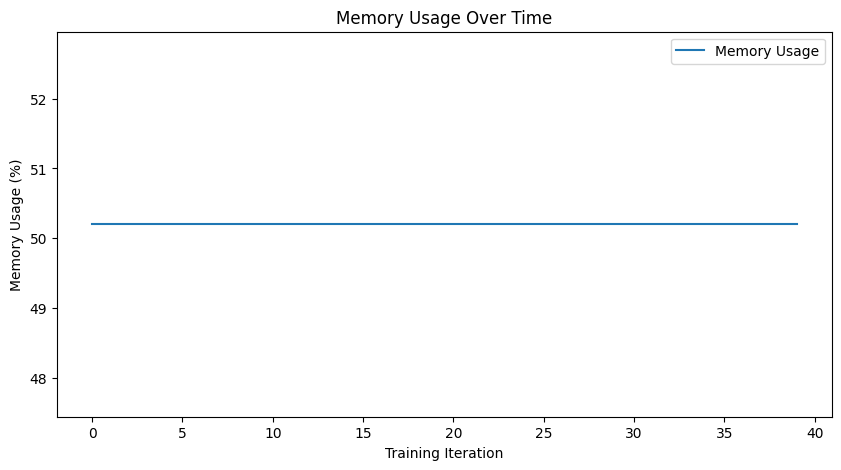

Average CPU Utilization: 60.01500000000001
Average Memory Usage: 50.2
Training time: 1.1153 seconds


In [13]:
import numpy as np
import psutil
import time

def build_tree(X, y, max_depth=None, depth=0):
    num_samples, num_features = X.shape
    unique_classes = np.unique(y)

    # Stop if only one class is present or max depth is reached
    if len(unique_classes) == 1 or (max_depth and depth == max_depth):
        return {"class": unique_classes[0]}

    # Find the best split
    start_cpu_utilization = psutil.cpu_percent()
    best_feature, best_threshold = find_best_split(X, y)
    end_cpu_utilization = psutil.cpu_percent()
    cpu_utilization_log.append(end_cpu_utilization - start_cpu_utilization)

    # Log memory usage
    memory_percent = psutil.virtual_memory().percent
    memory_usage_log.append(memory_percent)

    # Split the data
    left_mask = X[:, best_feature] <= best_threshold
    right_mask = ~left_mask
    left_tree = build_tree(X[left_mask], y[left_mask], max_depth, depth + 1)
    right_tree = build_tree(X[right_mask], y[right_mask], max_depth, depth + 1)

    # Return the decision node
    return {
        "feature_index": best_feature,
        "threshold": best_threshold,
        "left": left_tree,
        "right": right_tree
    }

def find_best_split(X, y):
    num_samples, num_features = X.shape
    if num_samples <= 1:
        return None, None

    # Calculate the Gini impurity for each possible split
    all_thresholds = np.sort(X)
    all_thresholds = (all_thresholds[:-1] + all_thresholds[1:]) / 2.0

    best_gini = float('inf')
    best_feature = None
    best_threshold = None

    for feature_index in range(num_features):
        thresholds = all_thresholds[:, feature_index]
        for threshold in thresholds:
            left_mask = X[:, feature_index] <= threshold
            right_mask = ~left_mask
            gini = calculate_gini(y[left_mask]) + calculate_gini(y[right_mask])
            if gini < best_gini:
                best_gini = gini
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold

def calculate_gini(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities**2)
    return gini

def predict_tree(x, tree):
    if "class" in tree:
        return tree["class"]
    feature_value = x[tree["feature_index"]]
    if feature_value <= tree["threshold"]:
        return predict_tree(x, tree["left"])
    else:
        return predict_tree(x, tree["right"])

# Load the Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
cpu_utilization_log = []
memory_usage_log = []

start_time = time.time()
for _ in range(10):  # Repeat training for better graph visibility
    tree = build_tree(X_train, y_train, max_depth=3)
end_time = time.time()

# Make predictions
y_pred = np.array([predict_tree(x, tree) for x in X_test])

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot CPU utilization over time
plt.figure(figsize=(10, 5))
plt.plot(cpu_utilization_log, label='CPU Utilization')
plt.title('CPU Utilization Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('CPU Utilization (%)')
plt.legend()
plt.show()

# Plot memory usage over time
plt.figure(figsize=(10, 5))
plt.plot(memory_usage_log, label='Memory Usage')
plt.title('Memory Usage Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('Memory Usage (%)')
plt.legend()
plt.show()

# Calculate average CPU and memory utilization
avg_cpu_utilization = np.mean(cpu_utilization_log)
avg_memory_utilization = np.mean(memory_usage_log)

print("Average CPU Utilization:", avg_cpu_utilization)
print("Average Memory Usage:", avg_memory_utilization)
print(f"Training time: {end_time - start_time:.4f} seconds")

Accuracy: 0.6666666666666666


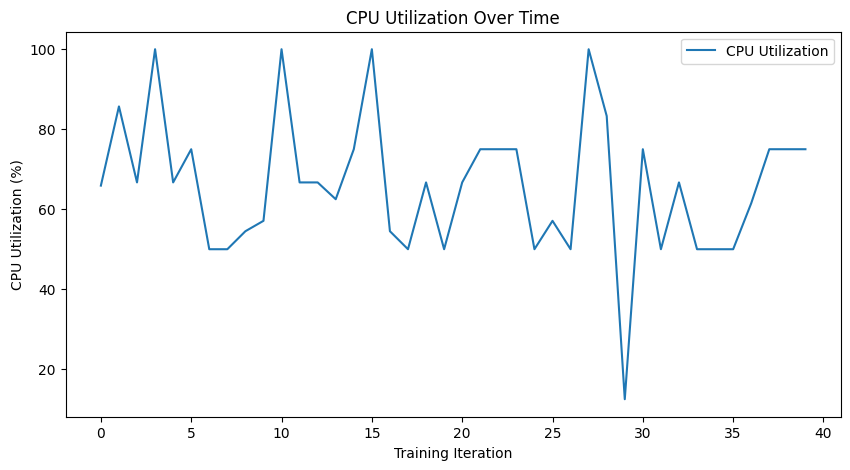

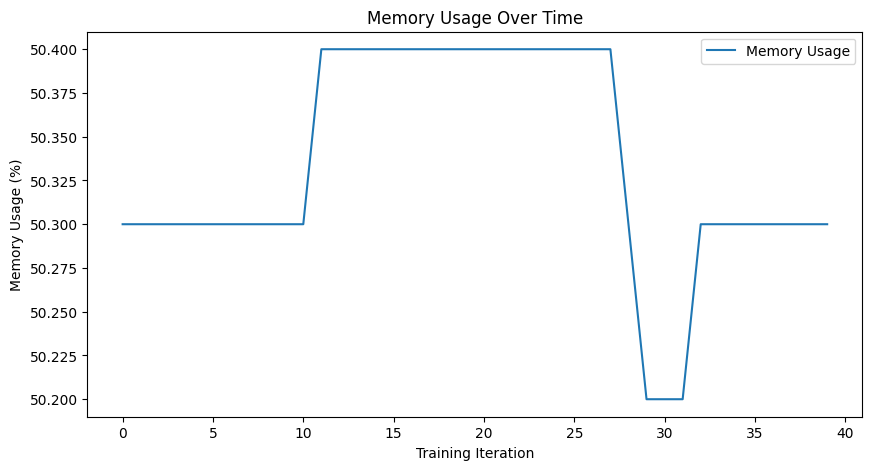

Average CPU Utilization: 65.9125
Average Memory Usage: 50.335
Training time: 1.1593 seconds


In [14]:
import numpy as np
import psutil
import time

def build_tree(X, y, max_depth=None, depth=0):
    num_samples, num_features = X.shape
    unique_classes = np.unique(y)

    # Stop if only one class is present or max depth is reached
    if len(unique_classes) == 1 or (max_depth and depth == max_depth):
        return {"class": unique_classes[0]}

    # Find the best split
    start_cpu_utilization = psutil.cpu_percent()
    best_feature, best_threshold = find_best_split(X, y)
    end_cpu_utilization = psutil.cpu_percent()
    cpu_utilization_log.append(end_cpu_utilization - start_cpu_utilization)

    # Log memory usage
    memory_percent = psutil.virtual_memory().percent
    memory_usage_log.append(memory_percent)

    # Split the data
    left_mask = X[:, best_feature] <= best_threshold
    right_mask = ~left_mask
    left_tree = build_tree(X[left_mask], y[left_mask], max_depth, depth + 1)
    right_tree = build_tree(X[right_mask], y[right_mask], max_depth, depth + 1)

    # Return the decision node
    return {
        "feature_index": best_feature,
        "threshold": best_threshold,
        "left": left_tree,
        "right": right_tree
    }

def find_best_split(X, y):
    num_samples, num_features = X.shape
    if num_samples <= 1:
        return None, None

    # Calculate the Gini impurity for each possible split
    all_thresholds = np.sort(X)
    all_thresholds = (all_thresholds[:-1] + all_thresholds[1:]) / 2.0

    best_gini = float('inf')
    best_feature = None
    best_threshold = None

    for feature_index in range(num_features):
        thresholds = all_thresholds[:, feature_index]
        for threshold in thresholds:
            left_mask = X[:, feature_index] <= threshold
            right_mask = ~left_mask
            gini = calculate_gini(y[left_mask]) + calculate_gini(y[right_mask])
            if gini < best_gini:
                best_gini = gini
                best_feature = feature_index
                best_threshold = threshold

    return best_feature, best_threshold

def calculate_gini(y):
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    gini = 1 - np.sum(probabilities**2)
    return gini

def predict_tree(x, tree):
    if "class" in tree:
        return tree["class"]
    feature_value = x[tree["feature_index"]]
    if feature_value <= tree["threshold"]:
        return predict_tree(x, tree["left"])
    else:
        return predict_tree(x, tree["right"])

# Load the Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
cpu_utilization_log = []
memory_usage_log = []

start_time = time.time()
for _ in range(10):  # Repeat training for better graph visibility
    tree = build_tree(X_train, y_train, max_depth=3)
end_time = time.time()

# Make predictions
y_pred = np.array([predict_tree(x, tree) for x in X_test])

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot CPU utilization over time
plt.figure(figsize=(10, 5))
plt.plot(cpu_utilization_log, label='CPU Utilization')
plt.title('CPU Utilization Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('CPU Utilization (%)')
plt.legend()
plt.show()

# Plot memory usage over time
plt.figure(figsize=(10, 5))
plt.plot(memory_usage_log, label='Memory Usage')
plt.title('Memory Usage Over Time')
plt.xlabel('Training Iteration')
plt.ylabel('Memory Usage (%)')
plt.legend()
plt.show()

# Calculate average CPU and memory utilization
avg_cpu_utilization = np.mean(cpu_utilization_log)
avg_memory_utilization = np.mean(memory_usage_log)

print("Average CPU Utilization:", avg_cpu_utilization)
print("Average Memory Usage:", avg_memory_utilization)
print(f"Training time: {end_time - start_time:.4f} seconds")

#Average Time Calculation:

In [17]:
def calculate_average_time(times):
    if not times:
        return 0  # Avoid division by zero if the list is empty
    total_seconds = sum(time.total_seconds() for time in times)
    average_seconds = total_seconds / len(times)
    average_time = timedelta(seconds=average_seconds)
    return average_time

In [18]:
from datetime import timedelta

time_values = [timedelta( seconds=1.0873 ),
               timedelta( seconds=1.1143 ),
               timedelta( seconds=1.1593 ),
               timedelta( seconds=1.1023 ),
               timedelta( seconds=1.1153 )]

average_time = calculate_average_time(time_values)
print(f"Average Time: {average_time}")


Average Time: 0:00:01.115700


# Average Percentage Calculations of Memory and Cpu utilization:

In [19]:
def calculate_average_percentage(percentages):
    if not percentages:
        return 0  # Avoid division by zero if the list is empty
    total_percentage = sum(percentages)
    average_percentage = total_percentage / len(percentages)
    return average_percentage

In [22]:
percentage_values = [54.1025,65.8625,32.482,60.015,65.912]

average_percentage = calculate_average_percentage(percentage_values)
print(f"Average Percentage of Cpu utilization: {average_percentage}%")

Average Percentage of Cpu utilization: 55.674800000000005%


In [24]:
percentage_values = [50.595,49.9325,50.015,50.2,50.335]

average_percentage = calculate_average_percentage(percentage_values)
print(f"Average Percentage of Memory Utilization: {average_percentage}%")

Average Percentage of Memory Utilization: 50.215500000000006%


# Conversion Of Percentage Value to normal Value

In [4]:
def percentage_to_normal(percentage):
    
    normal_value = percentage / 100.0
    return normal_value

# Example usage:
percentage_value = 55.6
normal_value = percentage_to_normal(percentage_value)

print(f"{percentage_value}% is equivalent to {normal_value} as a normal value.")


55.6% is equivalent to 0.556 as a normal value.


# Power Utilization Of This Algo

In [9]:
Power=((1-0.556)*10)+(0.556*(77))
Power

47.252

# Energy Consumption:

In [11]:
Energy=1.115*47.252
Energy

52.68598